In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset('mpg') # load dataset
df.horsepower.fillna(0, inplace=True) # remove missing values

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# if we want to build a supervised ML model, we need to split the data into features and target (so what are we trying to predict?)
# for the purpose of the workshop, lets assume one of the categorical variables is the target 

In [5]:
# how many unique values does the categorical variables have?

for i in df[df.columns[df.dtypes == 'object'].to_list()]:
    print(f"variable {i} has: {len(np.unique(df[i]))} unique values")

variable origin has: 3 unique values
variable name has: 305 unique values


In [6]:
# Name has too many level, for the purpose of this workshop will drop this
# However, worth looking into how to deal with categorical variables with high cardinality:
# Resources: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [7]:
# define target 
y = df['origin']
print(y.shape)

# define features
X = df.drop(['name', 'origin'], axis=1)
print(X.shape)

(398,)
(398, 7)


In [8]:
# Visualize the target
y.value_counts()


usa       249
japan      79
europe     70
Name: origin, dtype: int64

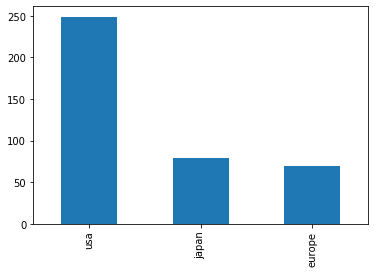

In [9]:
y.value_counts().plot(kind='bar');


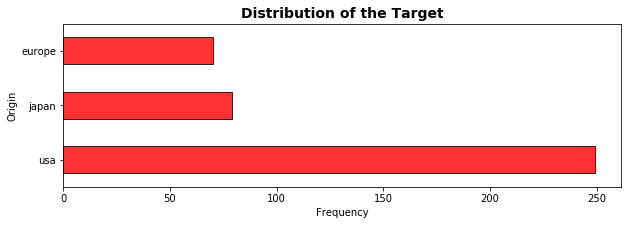

In [10]:
# format the chart 
plt.figure(figsize=(10, 3))
y.value_counts().plot(kind='barh', alpha=0.8, color='red', edgecolor='black') # change the colour
plt.title('Distribution of the Target', size=14, weight='bold') # add a title
plt.xlabel('Frequency', size=10) # add an x and y label
plt.ylabel('Origin', size=10)
plt.show() 

In [159]:
# dealing with imbalanced target data - but outside the scope of the workshop

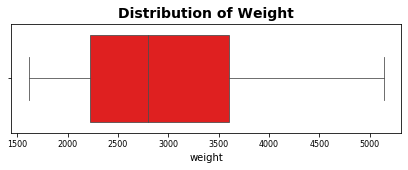

In [160]:
# Visualize the features

# Boxplots

# Can look at the boxplot of a specific variable
plt.figure(figsize=(7, 2))
sns.boxplot(x=X['weight'], color='red', linewidth=0.8)
plt.tick_params(labelsize=8, rotation=0)
plt.title('Distribution of Weight', size=14, weight='bold')
plt.show()

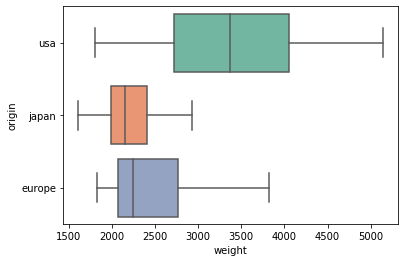

In [161]:
# Can also look at the boxplots for every country in origin 
sns.boxplot(x="weight", y="origin", data=df, palette="Set2");

# USA cars have the largest range, and highest median weight

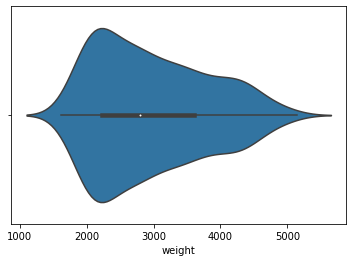

In [168]:
# we could also look at the weight variable as violin plot - combines the distribution and the boxplot

sns.violinplot(X['weight']);

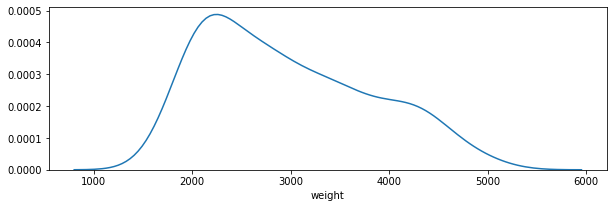

In [174]:
# we could also just look at the kernel distribution estimate dist plot
plt.figure(figsize=(10, 3))
sns.distplot(X['weight'], hist=False);

# TO DO: BRUSH UP ON KDE

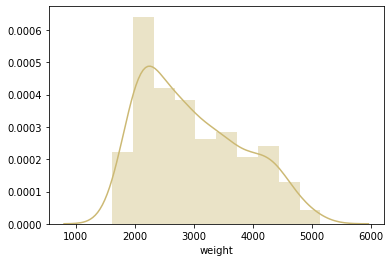

In [182]:
sns.distplot(X['weight'], color="y");

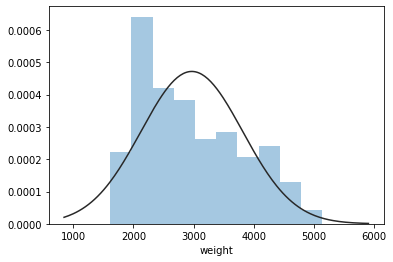

In [178]:
# something, I only discovered while preparing for this workshop
# if you want to replace the kde with a normal distribution
from scipy.stats import norm

sns.distplot(X['weight'], fit=norm, kde=False);

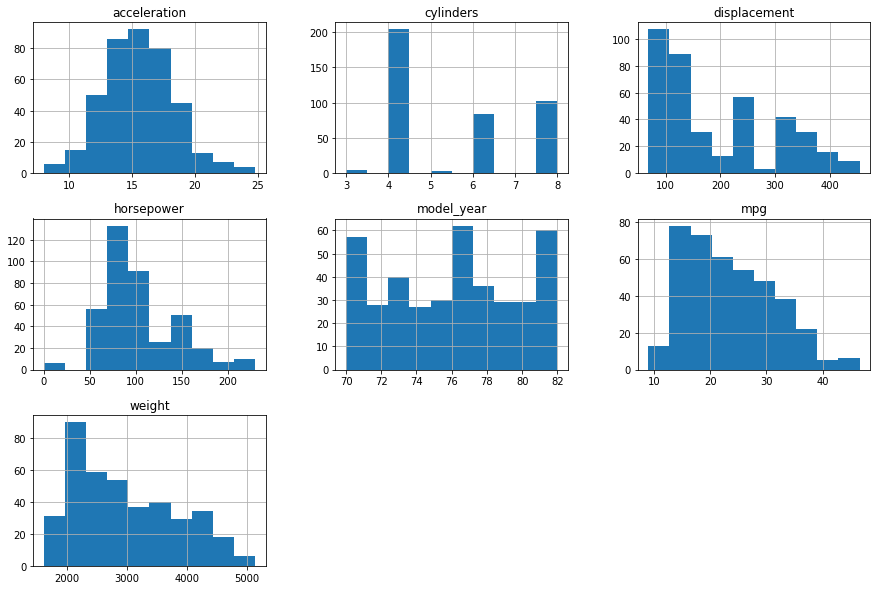

In [7]:
# If you dont want to go through each numerical one by one..
# you can visualize all the numerical data visualizations with this simple line of code...

df.hist(figsize=(15,10));

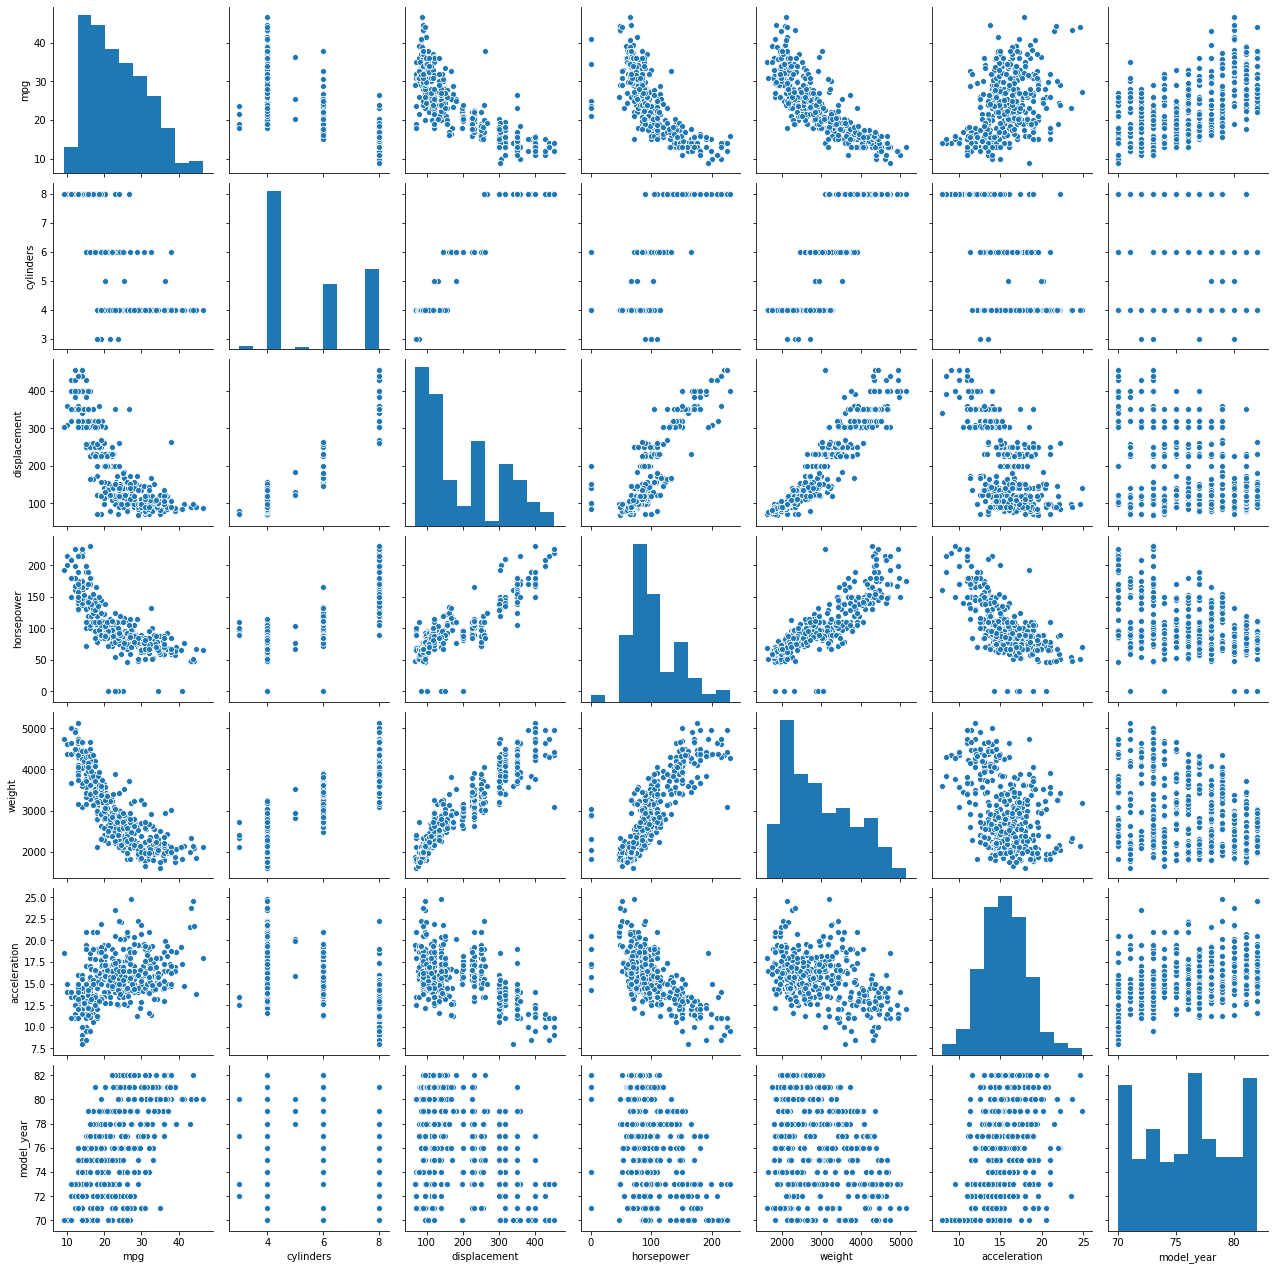

In [40]:
# and this line of code...

sns.pairplot(X);


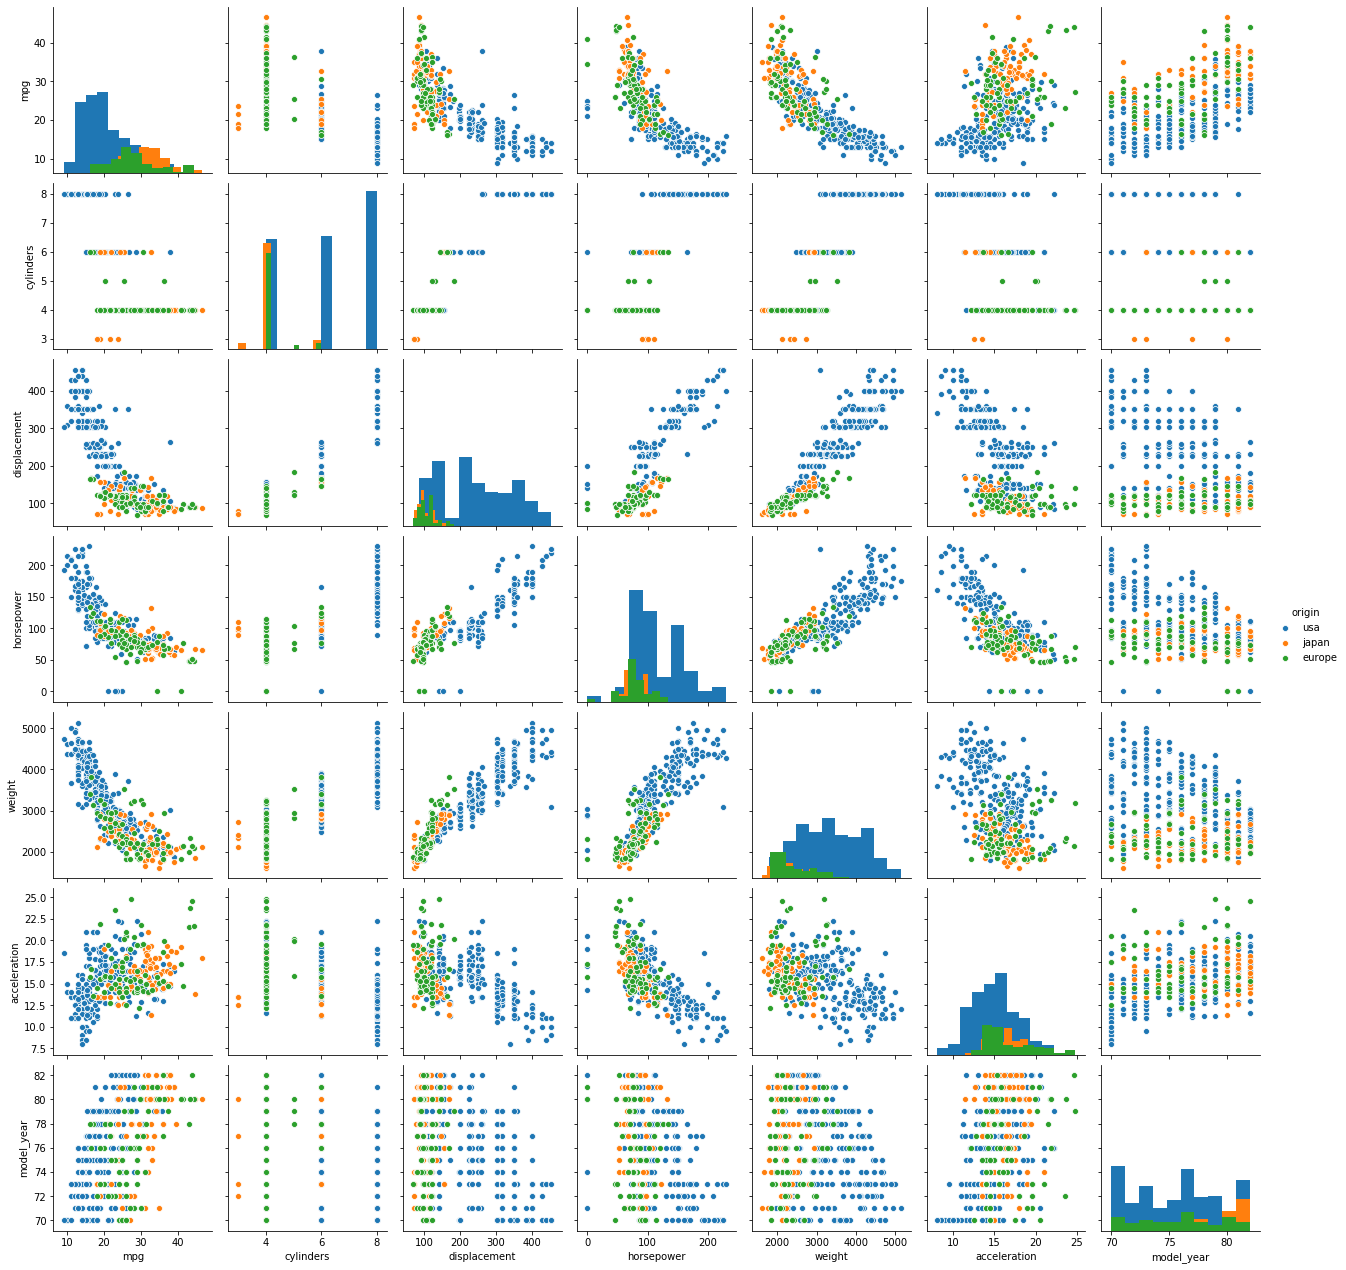

In [192]:
# test = df.drop(['name'], axis=1)

sns.pairplot(df, hue="origin", diag_kind="hist");

# can quickly see the range for all variables is largest in the cars originally from the USA

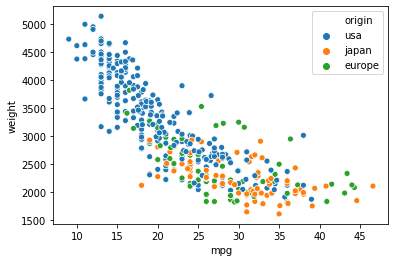

In [195]:
# any scatter plots we want to look at?

sns.scatterplot(data=df, x="mpg", y="weight", hue="origin");

In [13]:
# Correlation plots 

corr_matrix = df.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164
horsepower,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587
weight,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000


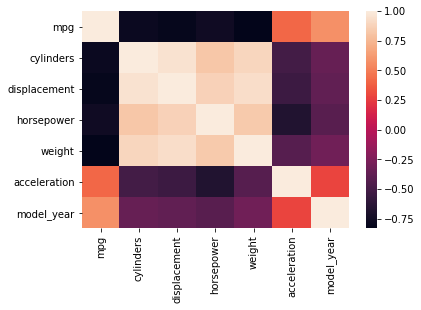

In [44]:
sns.heatmap(corr_matrix);

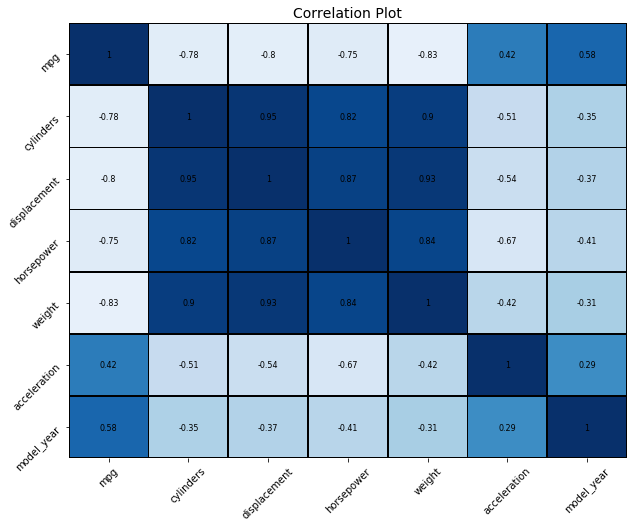

In [87]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            cmap="Blues", 
            linewidth=0.75,
            linecolor='black',
            cbar=False,
            # cbar_kws={"orientation": "horizontal"},
            vmin=-1, 
            vmax=1,
            annot=True,
            annot_kws={"size": 8, "color": "black"}
            # center=0
            # yticklabels=False)
           )

plt.tick_params(labelsize=10, rotation=45)
plt.title("Correlation Plot", size=14);

In [ ]:
# IF TIME, WILL GO OVER FEATURE IMPORTANCE PLOTS - LEARNING CURVES + CONFUSION MATRIX FROM ANOTHER NOTEBOOK
# https://github.com/shaq31415926/sample_test/blob/master/notebooks/ds_challenge.ipynb